In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("scores_data.csv")
df.head(5)

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [3]:
df.shape

(149, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.isnull().sum()

Batch      0
User_ID    0
Score      0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [9]:
df['Batch'].value_counts()

Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

In [10]:
df['Score'] = (df['Score'].astype(str).str.split('/').str[0])
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

In [11]:
df.groupby('Batch')['Score'].mean().sort_values(ascending=False)

Batch
AI_ELITE_7    5.056604
AI_ELITE_6    4.229167
AI_ELITE_4    3.791667
Name: Score, dtype: float64

In [12]:
df.groupby('Batch')['Score'].agg(['mean','median','std','min','max'])

,mean,median,std,min,max
Batch,,,,,
AI_ELITE_4,3.791667,4.0,1.443376,0,7
AI_ELITE_6,4.229167,4.0,1.640441,0,7
AI_ELITE_7,5.056604,5.0,1.446682,2,7


## Univariate Analysis – Score

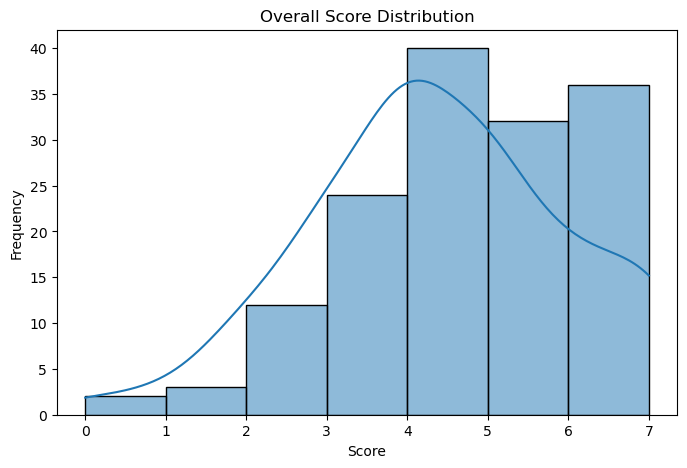

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Score'], bins=7, kde=True)
plt.title("Overall Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

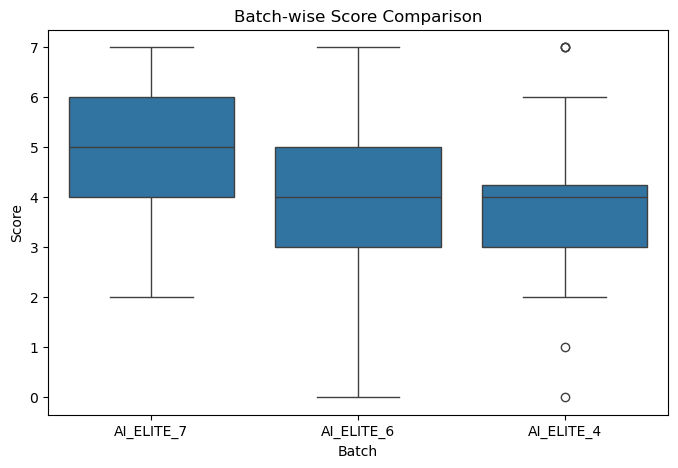

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Batch', y='Score', data=df)
plt.title("Batch-wise Score Comparison")
plt.show()

### Insights
1. Score distribution shows overall student performance pattern

2. Batch size varies, affecting average score interpretation

3. No major duplication in User_ID

## Univariate Analysis – Batch

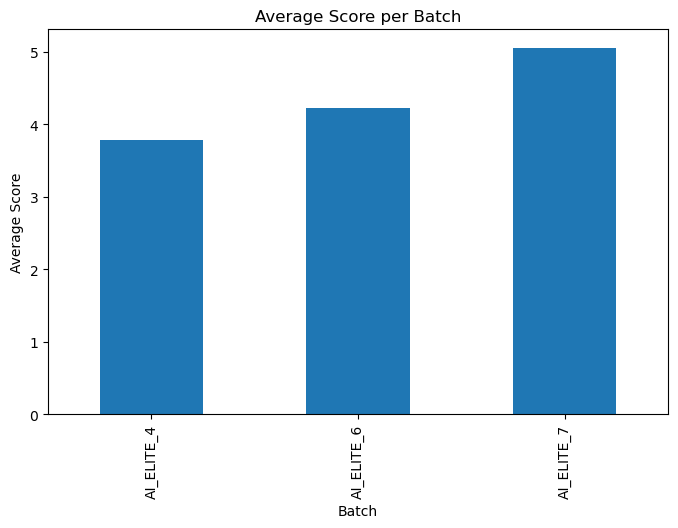

In [15]:
batch_mean = df.groupby('Batch')['Score'].mean()
plt.figure(figsize=(8,5))
batch_mean.plot(kind='bar')
plt.title("Average Score per Batch")
plt.xlabel("Batch")
plt.ylabel("Average Score")
plt.show()

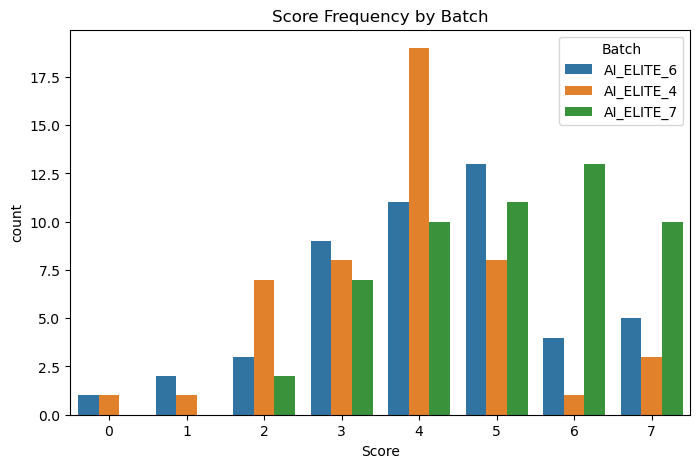

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='Score', hue='Batch', data=df)
plt.title("Score Frequency by Batch")
plt.show()

### Insights
1. Clear performance differences across batches

2. One batch shows higher consistency (lower spread)

3. Some batches require academic improvement support

In [17]:
df[df['Score'] >= 6].groupby('Batch')['User_ID'].count()

Batch
AI_ELITE_4     4
AI_ELITE_6     9
AI_ELITE_7    23
Name: User_ID, dtype: int64

In [18]:
df[df['Score'] <= 3].groupby('Batch')['User_ID'].count()

Batch
AI_ELITE_4    17
AI_ELITE_6    15
AI_ELITE_7     9
Name: User_ID, dtype: int64

### Insights

1. Target batches for intervention

2. Helps trainers design custom support plans